<a href="https://colab.research.google.com/github/Yevheniia-Ilchenko/ML_DS_tasks/blob/main/kNN_%D0%9A%D1%80%D0%BE%D1%81%D0%B2%D0%B0%D0%BB%D1%96%D0%B4%D0%B0%D1%86%D1%96%D1%8F_%D1%96_%D1%82%D1%8E%D0%BD%D0%B8%D0%BD%D0%B3_%D0%B3%D1%96%D0%BF%D0%B5%D1%80%D0%BF%D0%B0%D1%80%D0%B0%D0%BC%D0%B5%D1%82%D1%80%D1%96%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні ми знову працюємо з даними з нашого змагання ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0).

Тут ми побудуємо рішення задачі класифікації з використанням kNearestNeighboors, знайдемо оптимальні гіперпараметри для цього методу і зробимо базові ансамблі. Це дасть змогу порівняти перформанс моделі з попередніми вивченими методами.

In [190]:
from  process_bank_churn import preprocess_data, preprocess_new_data

In [189]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


0. Зчитайте дані `train.csv` та зробіть препроцесинг використовуючи написаний Вами скрипт `process_bank_churn.py` так, аби в результаті отримати дані в розбитті X_train, train_targets, X_val, val_targets для експериментів.

  Якщо Вам не вдалось реалізувати в завданні `2.3. Дерева прийняття рішень` скрипт `process_bank_churn.py` - можна скористатись готовим скриптом з запропонованого рішення того завдання.

In [191]:
import pandas as pd
raw_df = pd.read_csv("/content/train.csv", index_col=0)

In [192]:
raw_df.drop(columns=["CustomerId","Surname"], inplace=True)

In [193]:
input_cols = list(raw_df.columns[0:-1])

In [194]:
 input_cols

['CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

In [186]:
raw_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,
0,678.0,France,Male,29.0,4.0,0.00,3.0,1.0,0.0,180626.36,0.0
1,687.0,France,Female,34.0,1.0,0.00,2.0,0.0,1.0,63736.17,0.0
2,682.0,France,Female,52.0,6.0,0.00,3.0,0.0,0.0,179655.87,1.0
3,753.0,Germany,Male,44.0,6.0,83347.25,2.0,1.0,0.0,161407.48,0.0
4,544.0,Germany,Female,55.0,0.0,107747.57,1.0,1.0,0.0,176580.86,1.0
...,...,...,...,...,...,...,...,...,...,...,...
14995,585.0,France,Male,33.0,3.0,0.00,1.0,1.0,0.0,54191.38,0.0
14996,678.0,France,Male,34.0,6.0,0.00,2.0,1.0,1.0,53437.10,0.0
14997,678.0,France,Female,54.0,4.0,0.00,1.0,1.0,0.0,147720.29,1.0


датасет зі скейлингом

In [195]:
dataset = preprocess_data(raw_df)

In [196]:
dataset["input_cols"]

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Geography_France',
 'Geography_Germany',
 'Geography_Spain',
 'Gender_Female',
 'Gender_Male']

датасет зі  БЕЗ скейлинга

In [6]:
dataset_ = preprocess_data(raw_df, scaler_numeric=False)

In [197]:
dataset["X_train"]

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
id,,,,,,,,,,,,,
7180,0.599045,0.214286,0.1,0.626382,0.000000,1.0,1.0,0.719772,1.0,0.0,0.0,0.0,1.0
10393,0.603819,0.375000,0.2,0.848836,0.000000,1.0,0.0,0.727603,1.0,0.0,0.0,1.0,0.0
80,0.653938,0.303571,0.6,0.554522,0.333333,1.0,0.0,0.872180,0.0,1.0,0.0,0.0,1.0
3365,0.568019,0.714286,0.0,0.000000,0.333333,0.0,1.0,0.257797,0.0,0.0,1.0,0.0,1.0
12236,0.658711,0.053571,0.3,0.000000,0.333333,1.0,1.0,0.742837,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9493,0.482100,0.267857,0.4,0.000000,0.333333,0.0,0.0,0.617686,1.0,0.0,0.0,1.0,0.0
8463,0.577566,0.392857,0.1,0.000000,0.000000,1.0,1.0,0.239129,1.0,0.0,0.0,1.0,0.0
8143,0.453461,0.196429,0.8,0.000000,0.333333,1.0,1.0,0.667682,1.0,0.0,0.0,0.0,1.0


In [198]:
dataset

{'X_train':        CreditScore       Age  Tenure   Balance  NumOfProducts  HasCrCard  \
 id                                                                         
 7180      0.599045  0.214286     0.1  0.626382       0.000000        1.0   
 10393     0.603819  0.375000     0.2  0.848836       0.000000        1.0   
 80        0.653938  0.303571     0.6  0.554522       0.333333        1.0   
 3365      0.568019  0.714286     0.0  0.000000       0.333333        0.0   
 12236     0.658711  0.053571     0.3  0.000000       0.333333        1.0   
 ...            ...       ...     ...       ...            ...        ...   
 9493      0.482100  0.267857     0.4  0.000000       0.333333        0.0   
 8463      0.577566  0.392857     0.1  0.000000       0.000000        1.0   
 8143      0.453461  0.196429     0.8  0.000000       0.333333        1.0   
 11512     0.379475  0.428571     0.7  0.000000       0.333333        0.0   
 9360      0.272076  0.160714     0.2  0.000000       0.333333   

1. Навчіть на цих даних класифікатор kNN з параметрами за замовченням і виміряйте точність з допомогою AUROC на тренувальному та валідаційному наборах. Зробіть заключення про отриману модель: вона хороша/погана, чи є high bias/high variance?

In [199]:
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.tree import DecisionTreeClassifier

In [200]:
knn = KNeighborsClassifier()


In [205]:
knn.fit(dataset["X_train"], dataset["train_targets"])

KNeighborsClassifier()

In [206]:
def compute_auroc_and_roc(model, inputs, targets, name=''):
  # Predict probabilities
  y_pred_proba = model.predict_proba(inputs)[:, 1]

  # Compute ROC curve
  fpr, tpr, thresholds = roc_curve(targets, y_pred_proba)

  # Compute AUROC
  roc_auc = auc(fpr, tpr)
  print(f'AUROC for {name}: {roc_auc:.3f}')

датасет зі скейлингом

In [207]:
compute_auroc_and_roc(knn, dataset["X_train"], dataset["train_targets"], 'Training')
compute_auroc_and_roc(knn, dataset["X_val"], dataset["val_targets"], 'Validation')

AUROC for Training: 0.956
AUROC for Validation: 0.853


датасет зі БЕЗ скейлинга

In [202]:
knn.fit(dataset_["X_train"], dataset_["train_targets"])

KNeighborsClassifier()

In [16]:
compute_auroc_and_roc(knn, dataset_["X_train"], dataset_["train_targets"], 'Training')
compute_auroc_and_roc(knn, dataset_["X_val"], dataset_["val_targets"], 'Validation')

AUROC for Training: 0.846
AUROC for Validation: 0.611


По результатам AUROC помітне high variance(тобто перетренування) так як є сильна різниця між тренувальним і валідаційним результатами

2. Використовуючи `GridSearchCV` знайдіть оптимальне значення параметра `n_neighbors` для класифікатора `kNN`. Псотавте крос валідацію на 5 фолдів.

  Після успішного завершення пошуку оптимального гіперпараметра
    - виведіть найкраще значення параметра
    - збережіть в окрему змінну `knn_best` найкращу модель, знайдену з `GridSearchCV`
    - оцініть якість передбачень  `knn_best` на тренувальній і валідаційній вибірці з допомогою AUROC.
    - зробіть висновок про якість моделі. Чи стала вона краще порівняно з попереднім пукнтом (2) цього завдання? Чи є вона краще за дерево прийняття рішень з попереднього ДЗ?

In [208]:
import numpy as np

knn = KNeighborsClassifier()
params_knn = {'n_neighbors': np.arange(1, 25)}
knn_gs = GridSearchCV(knn, params_knn, cv=5,  scoring='roc_auc')
knn_gs.fit(dataset["X_train"], dataset["train_targets"])

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             scoring='roc_auc')

In [209]:
knn_best = knn_gs.best_estimator_

print(knn_gs.best_params_, knn_gs.best_score_)

{'n_neighbors': 19} 0.8853000771869176


In [210]:
compute_auroc_and_roc(knn_best, dataset["X_train"], dataset["train_targets"], 'Training')
compute_auroc_and_roc(knn_best, dataset["X_val"], dataset["val_targets"], 'Validation')

AUROC for Training: 0.923
AUROC for Validation: 0.891


Тестую варіант якщо додати scoring= roc_auc

In [211]:
knn_ = KNeighborsClassifier()
params_knn = {'n_neighbors': np.arange(1, 25)}
knn_gs_ = GridSearchCV(knn, params_knn, cv=5,  scoring='roc_auc')
knn_gs_.fit(dataset["X_train"], dataset["train_targets"])

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             scoring='roc_auc')

In [212]:
knn_best_ = knn_gs.best_estimator_

print(knn_gs_.best_params_, knn_gs_.best_score_)

{'n_neighbors': 19} 0.8853000771869176


In [213]:
compute_auroc_and_roc(knn_best_, dataset["X_train"], dataset["train_targets"], 'Training')
compute_auroc_and_roc(knn_best_, dataset["X_val"], dataset["val_targets"], 'Validation')

AUROC for Training: 0.923
AUROC for Validation: 0.891


У моделі трохи зналилась перетренованість, але не суттєво

Якщо порівнювати з Деревами рішень оцінка яких:

AUROC for Training: 0.926

AUROC for Validation: 0.923

 То KNN з GridSearchCV гірше генералізує

3. Виконайте пошук оптимальних гіперпараметрів для `DecisionTreeClassifier` з `GridSearchCV` за сіткою параметрів
  - `max_depth` від 1 до 20 з кроком 2
  - `max_leaf_nodes` від 2 до 10 з кроком 1

  Обовʼязково при цьому ініціюйте модель з фіксацією `random_seed`.

  Поставте кросвалідацію на 3 фолди, `scoring='roc_auc'`, та виміряйте, скільки часу потребує пошук оптимальних гіперпараметрів.

  Після успішного завершення пошуку оптимальних гіперпараметрів
    - виведіть найкращі значення параметра
    - збережіть в окрему змінну `dt_best` найкращу модель, знайдену з `GridSearchCV`
    - оцініть якість передбачень  `dt_best` на тренувальній і валідаційній вибірці з допомогою AUROC.
    - зробіть висновок про якість моделі. Чи ця модель краща за ту, що ви знайшли вручну?

In [220]:
%%time
dt = DecisionTreeClassifier(random_state=42)
params_dt = {'max_depth': np.arange(1, 20, 2), "max_leaf_nodes" : np.arange(2,10,1)}
dt_gs = GridSearchCV(dt, params_dt, cv=3, scoring='roc_auc')
dt_gs.fit(dataset["X_train"], dataset["train_targets"])

CPU times: user 5.95 s, sys: 13.6 ms, total: 5.96 s
Wall time: 6.06 s


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                         'max_leaf_nodes': array([2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='roc_auc')

In [221]:
dt_best = dt_gs.best_estimator_
print(dt_gs.best_params_, dt_gs.best_score_)

{'max_depth': 5, 'max_leaf_nodes': 9} 0.8990230600400091


In [222]:
compute_auroc_and_roc(dt_best, dataset["X_train"], dataset["train_targets"], 'Training')
compute_auroc_and_roc(dt_best, dataset["X_val"], dataset["val_targets"], 'Validation')

AUROC for Training: 0.900
AUROC for Validation: 0.898


Судячи по оцінки ця модель не є кращою, оцінка відрізняється на 0.02

4. Виконайте пошук оптимальних гіперпараметрів для `DecisionTreeClassifier` з `RandomizedSearchCV` за заданою сіткою параметрів і кількість ітерацій 40.

  Поставте кросвалідацію на 3 фолди, `scoring='roc_auc'`, зафіксуйте `random_seed` процедури крос валідації та виміряйте, скільки часу потребує пошук оптимальних гіперпараметрів.

  Після успішного завершення пошуку оптимальних гіперпараметрів
    - виведіть найкращі значення параметра
    - збережіть в окрему змінну `dt_random_search_best` найкращу модель, знайдену з `RandomizedSearchCV`
    - оцініть якість передбачень  `dt_random_search_best` на тренувальній і валідаційній вибірці з допомогою AUROC.
    - зробіть висновок про якість моделі. Чи ця модель краща за ту, що ви знайшли з `GridSearch`?
    - проаналізуйте параметри `dt_random_search_best` і порівняйте з параметрами `dt_best` - яку бачите відмінність? Ця вправа потрібна аби зрозуміти, як різні налаштування `DecisionTreeClassifier` впливають на якість моделі.

In [223]:
import numpy as np
params_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': np.arange(1, 20),
    'max_leaf_nodes': np.arange(2, 20),
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [None, 'sqrt', 'log2']
}

In [236]:
%%time
dt = DecisionTreeClassifier(random_state=42)
dt_rs = RandomizedSearchCV(dt, params_dt,n_iter = 40, cv=3, scoring='roc_auc')
dt_rs.fit(dataset["X_train"], dataset["train_targets"])

CPU times: user 1.87 s, sys: 8.5 ms, total: 1.88 s
Wall time: 1.88 s


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=40,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'max_leaf_nodes': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'min_samples_leaf': [1, 2, 4, 8],
                                        'min_samples_split': [2, 5, 10, 20],
                                        'splitter': ['best', 'random']},
                   scoring='roc_auc')

In [237]:
dt_random_search_best = dt_rs.best_estimator_
print(dt_rs.best_params_, dt_rs.best_score_)

{'splitter': 'best', 'min_samples_split': 20, 'min_samples_leaf': 2, 'max_leaf_nodes': 17, 'max_features': None, 'max_depth': 7, 'criterion': 'entropy'} 0.9153219089659768


In [238]:
compute_auroc_and_roc(dt_random_search_best, dataset["X_train"], dataset["train_targets"], 'Training')
compute_auroc_and_roc(dt_random_search_best, dataset["X_val"], dataset["val_targets"], 'Validation')

AUROC for Training: 0.920
AUROC for Validation: 0.921


Модель зараз вийшла краще ніж з GS, але і параметрів більше. Окремо помітила що використовується 'criterion': 'entropy', та 'splitter': 'best'. Але потестувавши декілька разів помітила що не мтабільна модель, тобто змінює оцінку після перезапуску

5. Якщо у Вас вийшла метрика `AUROC` в цій серії експериментів - зробіть ще один `submission` на Kaggle і додайте код для цього і скріншот скора на публічному лідерборді нижче.

  Сподіваюсь на цьому етапі ви вже відчули себе справжнім дослідником 😉

In [258]:
raw_test_df = pd.read_csv("/content/test.csv", index_col=0)

raw_test_df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
id,,,,,,,,,,,,
15000,15594796.0,Chu,584.0,Germany,Male,30.0,2.0,146053.66,1.0,1.0,1.0,157891.86
15001,15642821.0,Mazzi,551.0,France,Male,39.0,5.0,0.00,2.0,1.0,1.0,67431.28
15002,15716284.0,Onyekachi,706.0,France,Male,43.0,8.0,0.00,2.0,1.0,0.0,156768.45
15003,15785078.0,Martin,717.0,Spain,Male,45.0,3.0,0.00,1.0,1.0,1.0,166909.87
15004,15662955.0,Kenechukwu,592.0,Spain,Male,43.0,8.0,0.00,2.0,1.0,1.0,143681.97
...,...,...,...,...,...,...,...,...,...,...,...,...
24995,15642997.0,Chukwumaobim,639.0,Spain,Male,38.0,10.0,0.00,2.0,1.0,1.0,49637.65
24996,15739271.0,Clements,678.0,Spain,Male,39.0,9.0,0.00,2.0,1.0,1.0,142513.50
24997,15756743.0,Chidiebere,774.0,France,Male,30.0,9.0,0.00,2.0,1.0,0.0,4861.72


In [259]:
raw_test_df.drop(columns=["CustomerId","Surname"], inplace=True)

In [260]:
raw_test_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
id,,,,,,,,,,
15000,584.0,Germany,Male,30.0,2.0,146053.66,1.0,1.0,1.0,157891.86
15001,551.0,France,Male,39.0,5.0,0.00,2.0,1.0,1.0,67431.28
15002,706.0,France,Male,43.0,8.0,0.00,2.0,1.0,0.0,156768.45
15003,717.0,Spain,Male,45.0,3.0,0.00,1.0,1.0,1.0,166909.87
15004,592.0,Spain,Male,43.0,8.0,0.00,2.0,1.0,1.0,143681.97
...,...,...,...,...,...,...,...,...,...,...
24995,639.0,Spain,Male,38.0,10.0,0.00,2.0,1.0,1.0,49637.65
24996,678.0,Spain,Male,39.0,9.0,0.00,2.0,1.0,1.0,142513.50
24997,774.0,France,Male,30.0,9.0,0.00,2.0,1.0,0.0,4861.72


In [261]:
categorical_cols = raw_test_df.select_dtypes(include="object").columns.tolist()
encoded_categorical_data = dataset["encoder"].transform(new_inputs[categorical_cols])

In [262]:
encoded_categorical_data

array([[0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.]])

In [263]:
encoded_categorical_df = pd.DataFrame(encoded_categorical_data, columns= dataset["encoder"].get_feature_names_out(categorical_cols))

encoded_categorical_df

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...
9995,0.0,0.0,1.0,0.0,1.0
9996,0.0,0.0,1.0,0.0,1.0
9997,1.0,0.0,0.0,0.0,1.0
9998,1.0,0.0,0.0,0.0,1.0


In [264]:
all_inputs = pd.concat([raw_test_df.reset_index(drop=True), encoded_categorical_df.reset_index(drop=True)], axis=1)


In [266]:
all_inputs.drop(columns=categorical_cols, inplace=True)


In [268]:
numeric_cols = raw_test_df.select_dtypes(include=np.number).columns.tolist()
all_inputs[numeric_cols] = dataset["scaler"].transform(all_inputs[numeric_cols])


In [271]:
test_pred_proba = dt_random_search_best.predict_proba(all_inputs)[:, 1]
test_pred_proba

array([0.23791103, 0.01211499, 0.14507772, ..., 0.01211499, 0.03930131,
       0.18763797])

In [272]:
sample = pd.read_csv("/content/sample_submission.csv", index_col=0)
sample.drop(columns="Exited")

""
id
15000
15001
15002
15003
15004
...
24995
24996
24997


In [273]:
sample["Exited"] = test_pred_proba
sample

,Exited
id,
15000,0.237911
15001,0.012115
15002,0.145078
15003,0.569848
15004,0.082171
...,...
24995,0.012115
24996,0.012115
24997,0.012115


In [274]:
sample.to_csv("submission.csv")

Результат виявився краще ніж DT без RSearch

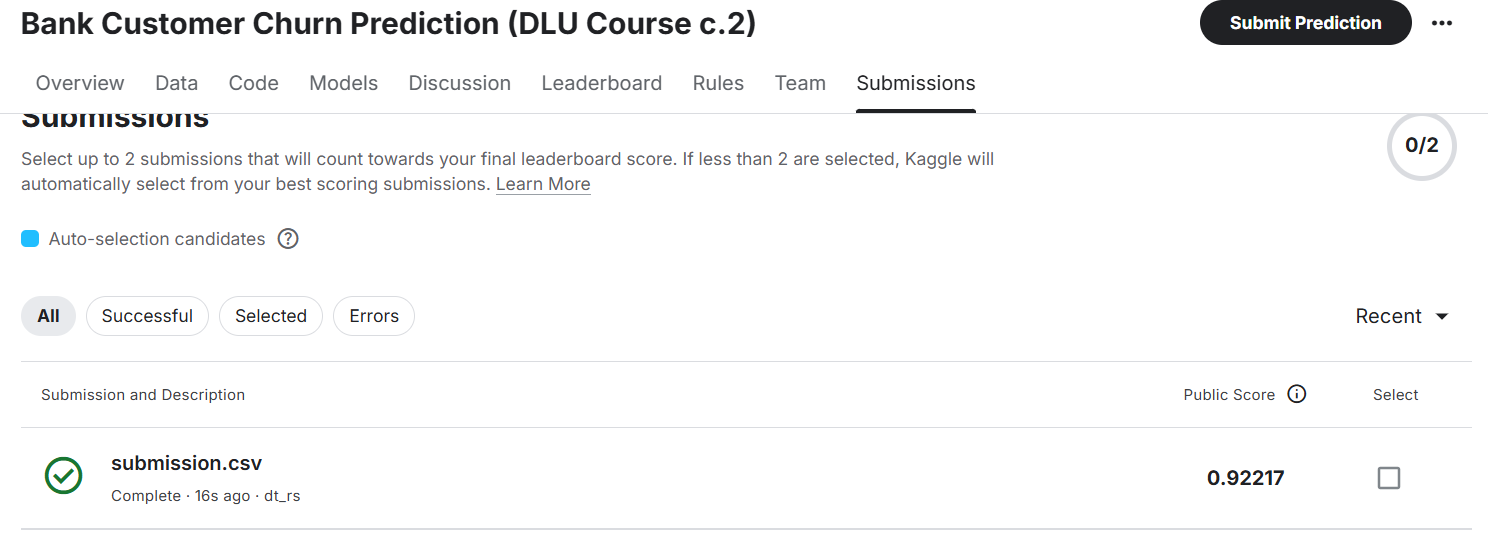